# Final

Since we have established that XGBoost, after hyperparameter tuning, was the best performing model for our imbalanced binary classification task, we now focus on training, evaluating and understanding the model. 

Furthermore, we create a function that makes use of the pre-trained model to order a set of transactions by likelihood of matching a receipt image.

In [109]:
import numpy as np
import pandas as pd

In [110]:
df_cleaned = pd.read_csv('df_cleaned.csv')
df_cleaned= df_cleaned.set_index(['receipt_id', 'company_id', 'matched_transaction_id','feature_transaction_id'])  
df_cleaned.head(10)

DateMappingMatch  \
receipt_id company_id matched_transaction_id feature_transaction_id                     
10,001     10000      10,605                 10,596                              0.00   
                                             10,597                              0.00   
                                             10,598                              0.00   
                                             10,599                              0.00   
                                             10,600                              0.00   
                                             10,605                              0.90   
                                             10,606                              0.90   
10,002     10000      10,286                 10,286                              0.95   
                                             10,287                              0.95   
                                             10,288                              0.95   

                                                                     AmountMappingMatch  \
receipt_id company_id matched_transaction_id feature_transaction_id                       
10,001     10000      10,605                 10,596                                 0.4   
                                             10,597                                 0.0   
                                             10,598                                 0.0   
                                             10,599                                 0.0   
                                             10,600                                 0.0   
                                             10,605                                 0.0   
                                             10,606                                 0.0   
10,002     10000      10,286                 10,286                                 0.0   
                                             10,287                                 0.0   
                                             10,288                                 0.0   

                                                                     DescriptionMatch  \
receipt_id company_id matched_transaction_id feature_transaction_id                     
10,001     10000      10,605                 10,596                               0.0   
                                             10,597                               0.0   
                                             10,598                               0.0   
                                             10,599                               0.0   
                                             10,600                               0.0   
                                             10,605                               0.0   
                                             10,606                               0.0   
10,002     10000      10,286                 10,286                               0.0   
                                             10,287                               0.0   
                                             10,288                               0.0   

                                                                     DifferentPredictedTime  \
receipt_id company_id matched_transaction_id feature_transaction_id                           
10,001     10000      10,605                 10,596                                     1.0   
                                             10,597                                     1.0   
                                             10,598                                     1.0   
                                             10,599                                     1.0   
                                             10,600                                     1.0   
                                             10,605                                     1.0   
                                             10,606                           

In [111]:
from pycaret.classification import *
exp_clf101 = setup(data = df_cleaned, target = 'is_match', session_id=26)

,Description,Value
0,session_id,26
1,Target,is_match
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(6468, 11)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [112]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9313,0.9265,0.5949,0.8471,0.6967,0.6595,0.6738,0.0550
xgboost,Extreme Gradient Boosting,0.9311,0.9329,0.6015,0.8389,0.6984,0.6609,0.6737,0.1370
dt,Decision Tree Classifier,0.9309,0.9220,0.5916,0.8463,0.6942,0.6568,0.6713,0.0040
rf,Random Forest Classifier,0.9309,0.9307,0.5983,0.8401,0.6965,0.6589,0.6723,0.0660
gbc,Gradient Boosting Classifier,0.9287,0.9324,0.6098,0.8125,0.6946,0.6553,0.6651,0.0400
lightgbm,Light Gradient Boosting Machine,0.9282,0.9340,0.5900,0.8245,0.6853,0.6462,0.6591,0.1360
knn,K Neighbors Classifier,0.9269,0.8754,0.6048,0.8028,0.6871,0.6469,0.6567,0.0220
ada,Ada Boost Classifier,0.9234,0.9320,0.5767,0.7988,0.6664,0.6246,0.6371,0.0340
nb,Naive Bayes,0.9205,0.9280,0.5716,0.7767,0.6559,0.6123,0.6230,0.0040
svm,SVM - Linear Kernel,0.9185,0.0000,0.5202,0.8021,0.6281,0.5850,0.6038,0.0060


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=26, verbose=0,
                     warm_start=False)

In [113]:
xgboost = create_model('xgboost')
tuned_xgboost = tune_model(xgboost)
print(tuned_xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9338,0.9420,0.6393,0.8298,0.7222,0.6853,0.6929
1,0.9360,0.9372,0.7213,0.7857,0.7521,0.7155,0.7163
2,0.9338,0.9200,0.6393,0.8298,0.7222,0.6853,0.6929
3,0.9316,0.9220,0.6066,0.8409,0.7048,0.6672,0.6786
4,0.9205,0.9477,0.6066,0.7551,0.6727,0.6281,0.6330
5,0.9139,0.9366,0.6167,0.6981,0.6549,0.6059,0.6074
6,0.9139,0.9108,0.5167,0.7561,0.6139,0.5673,0.5804
7,0.9314,0.9416,0.6667,0.7843,0.7207,0.6819,0.6848
8,0.9403,0.9337,0.6500,0.8667,0.7429,0.7098,0.7192
9,0.9204,0.9161,0.5333,0.8000,0.6400,0.5972,0.6128


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0005, max_delta_step=0, max_depth=9,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=26, reg_alpha=0.0005,
              reg_lambda=1e-07, scale_pos_weight=2.1, subsample=0.7,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)


In [114]:
predict_model(tuned_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9299,0.9339,0.6151,0.7990,0.6951,0.6562,0.6634


# Evaluating Model Performance

## Classification Report

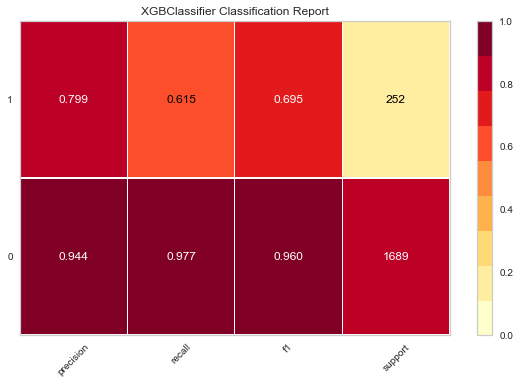

In [133]:
plot_model(tuned_xgboost,plot="class_report")

## ROC Curve

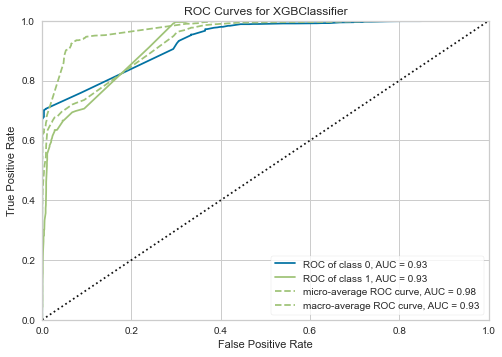

In [134]:
plot_model(tuned_xgboost,plot="auc")

## Precision Recall Curve

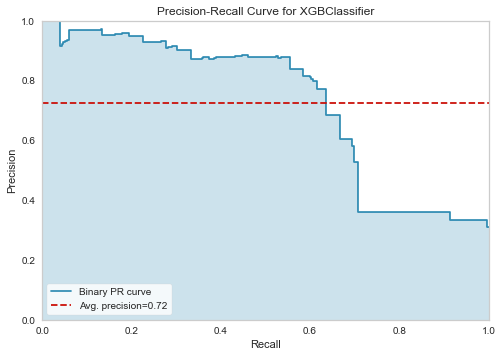

In [135]:
plot_model(tuned_xgboost,plot="pr")

## Model Decision Boundary

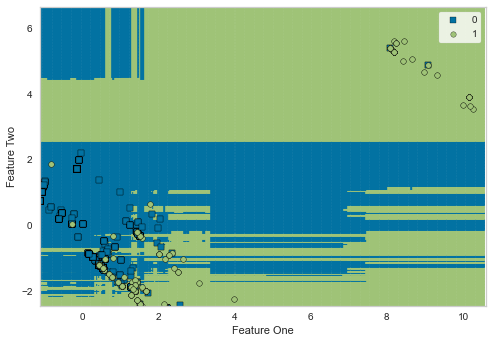

In [136]:
plot_model(tuned_xgboost,plot="boundary")

## Model Learning Curve

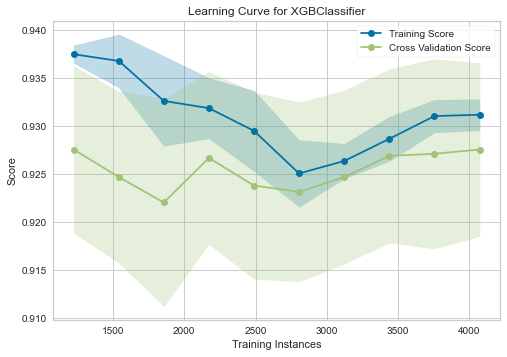

In [137]:
plot_model(tuned_xgboost,plot="learning")

## Feature Importance

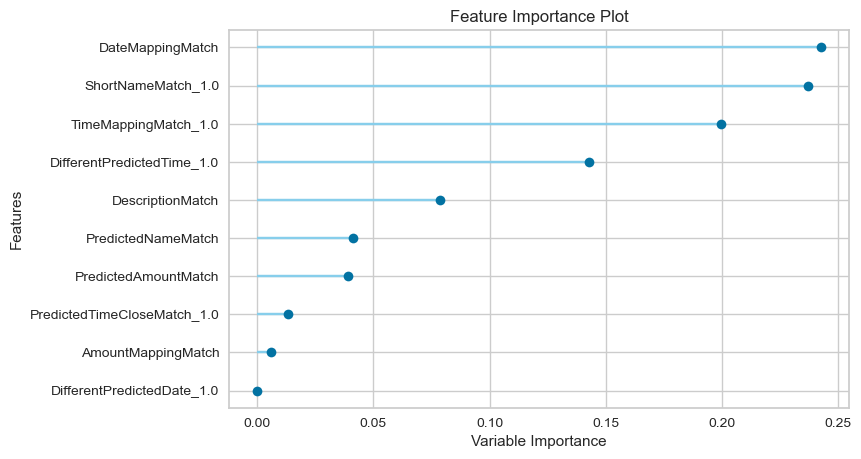

In [138]:
plot_model(tuned_xgboost,plot="feature")

In [123]:
# save the model to disk
filename = 'model_xgb_v1.1.sav'
joblib.dump(tuned_xgboost, filename)

['model_xgb_v1.1.sav']

## Function that uses the trained model to order a set of transactions for a given customer by likelihood of matching a receipt image.

Function that uses the pre-trained ML model to order a set of transactions by likelihood of matching a receipt image.
    
### Parameters
-----------
**receipt_id**: str
The receipt id is used to represent a unique receipt (for a given company_id). 
The transaction matching likelihoods will be generated corrusponding to a given reciept.

**company_id**: int
Optional to enter. Assuming that the receipt ids across all company_ids are unique.
Used to represent a unique Tide customer.

**data**: pandas DataFrame
    Data containing the transaction-reciept matching features for the given receipt_id along with the corrusponding feature_transaction_id.
    
More specifically, the DataFrame should exactly contain the following columns:

*['feature_transaction_id','DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch',
       'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch',
       'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch',
       'PredictedTimeCloseMatch']*
    
 ### Returns
-------
**dictionary_of_matches**: dictionary
    An ordered dictionary containing feature_transaction_ids as keys and the corrusponding likelihood of match as values.
    The entries in the dictionary are ordered by their likelihood of match to the receipt

In [124]:
def order_by_likelihood_of_match(data, receipt_id=None, company_id=None):
    """
    Function that uses the pre-trained ML model to order a set of transactions by likelihood of matching a receipt image.
    
    Parameters
-----------
data: pandas DataFrame
    Data containing the transaction-reciept matching features for the given receipt_id along with the corrusponding feature_transaction_id.
    More specifically, the DataFrame should exactly contain the following columns:
    ['feature_transaction_id','DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch',
       'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch',
       'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch',
       'PredictedTimeCloseMatch']

receipt_id: str
The receipt id is used to represent a unique receipt (for a given company_id). 
The transaction matching likelihoods will be generated corrusponding to a given reciept.

company_id: int
Optional to enter. Assuming that the receipt ids across all company_ids are unique.
Used to represent a unique Tide customer.


    
Returns
-------
dataframe_of_matches: pandas DataFrame
    A DataFrame containing feature_transaction_ids as its index and the corrusponding likelihood of match as a column.
    The entries in the DataFrame are ordered by their likelihood of match to the receipt.
    """
    
    # load the model from disk
    filename = 'model_xgb_v1.1.sav'
    tuned_xg = joblib.load(filename)
    given_receipt_id = receipt_id
    df = data.set_index("feature_transaction_id")
    result = pd.DataFrame(tuned_xg.predict_proba(df))
    result.columns = ["Not-Match Likelihood", "Match Likelihood"]
    result.index = df.index
    match_likelihood_ordered = result.drop(["Not-Match Likelihood"],axis=1)
    match_likelihood_ordered = match_likelihood_ordered.sort_values("Match Likelihood",ascending=False)
    #print(f"Generating Likelihood of Matches for reciept_id {receipt_id} currently...")
    return match_likelihood_ordered

## Pilot run

In order to test our function, we generate likelihood-of-match predictions for *receipt_id: 10,001*. 

In this case we already know that the correct match is corrusponding to *feature_transaction_id: 10,605*.

In [125]:
# Testing if our function works correctly and produces the desired output
# Preparing Data in the format needed by our function
df_pilot_run = df_cleaned.reset_index()
columns_to_retain = ['receipt_id','feature_transaction_id', 'DateMappingMatch', 'AmountMappingMatch',
       'DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch',
       'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate',
       'PredictedAmountMatch', 'PredictedTimeCloseMatch']
# Change this value to test for some other reciept_id
given_receipt_id = '10,001'

df_pilot_run = df_pilot_run.loc[df_pilot_run['receipt_id']==given_receipt_id,columns_to_retain]
df_pilot_run = df_pilot_run.drop(['receipt_id'],axis=1)
df_pilot_run.head(20)

,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
0,"10,596",0.0,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,"10,597",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,"10,598",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,"10,599",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,"10,600",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,"10,605",0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"10,606",0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
# Now that the data is in the correct format as required by our function, we can proceed to using it
predicted_matches =  order_by_likelihood_of_match(df_pilot_run,receipt_id="10,001")
print(predicted_matches)

                        Match Likelihood
feature_transaction_id                  
10,605                          0.504501
10,606                          0.504501
10,597                          0.495440
10,598                          0.495440
10,599                          0.495440
10,600                          0.495440
10,596                          0.495387
